In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans

In [ ]:
songs_5000 = spotify_5000songs.copy()

In [ ]:
songs_5000 = spotify_5000songs.copy()
songs_10 = spotify_10songs.copy()

In [ ]:
# remove spaces in the columns' names in the whole data frame
songs_5000.columns = songs_5000.columns.str.replace(' ', '')
songs_5000 = songs_5000.drop(columns = 'Unnamed:0').copy()

In [ ]:
# remove spaces in the columns' names in the whole data frame
songs_10.columns = songs_10.columns.str.replace(' ', '')
songs_10_with_name = songs_10.copy()
songs_10 = songs_10.drop(columns = ['song_name','artist', 'id', 'html']).copy()

In [ ]:
songs_10

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
1,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
2,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
3,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
4,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
5,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
6,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
7,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
8,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3
9,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4


# Data Transformers


*   Transformer WITHOUT changing the data distribution: **Scaling**

1.  Min-Max scaler: scale from 0 (min value) to 1 (max value)
2.  Standard scaler: scale around 0 (mean value) and define the spread with the deviation of 1
3.  Robust scaler: scale around 0 (median value) and define the spread with Q1 & Q3 (only the 50% of the data determined it)




*   Transformer manipulating the data distribution


1.   Quantile transformer: neglect the difference of value, mainly simply giving the distance for order
2.   Power transformer: reshape distribution closer to normal distribution





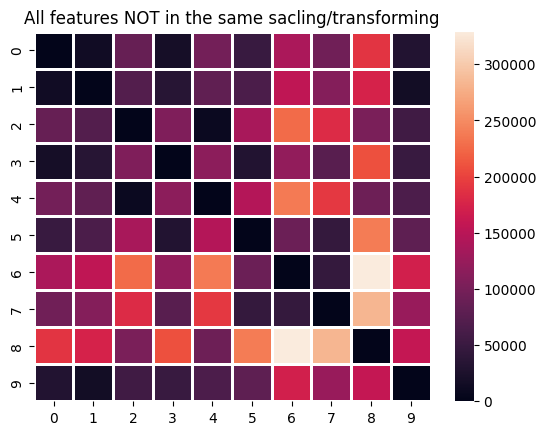

In [ ]:
# Making the DataFrame for the heatmap including age
without_transformer = pd.DataFrame(pairwise_distances(songs_10),
                                     index=songs_10.index,
                                     columns=songs_10.index)

# Plotting the heat plot
ax = sns.heatmap(without_transformer, linewidths =2)


# Adding titles to the plot
ax.set_title('All features NOT in the same sacling/transforming')

plt.show()

## Min-Max Scaler

   original  transformed_scale
9    61.494           0.000000
8    61.541           0.000484
1   104.504           0.442503
0   120.014           0.602076
7   128.009           0.684332
3   129.318           0.697799
6   131.997           0.725362
2   143.418           0.842866
5   148.174           0.891797
4   158.691           1.000000


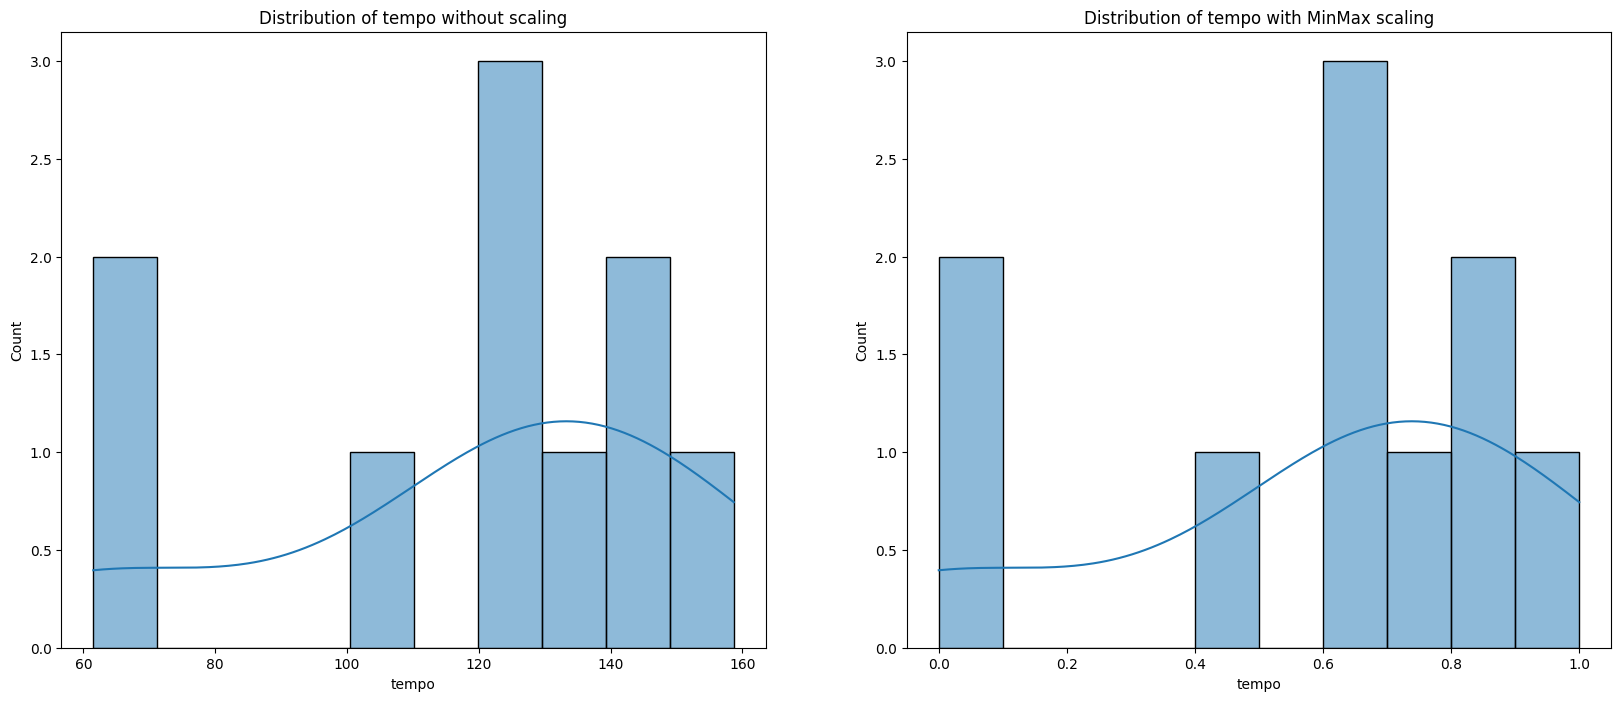

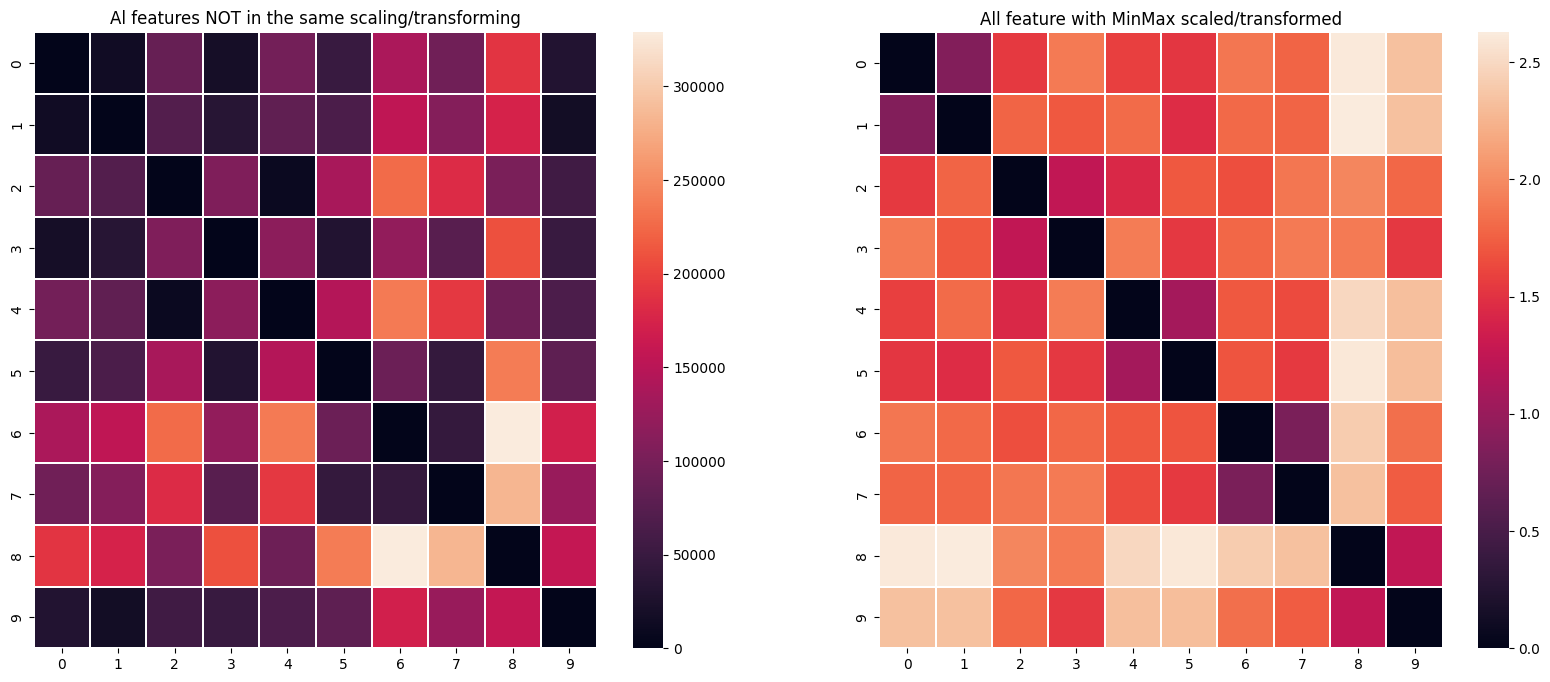

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/

# Scale the songs_10 DataFrame
transformed_songs = scaler.fit_transform(songs_10)

# Display column of original DataFrame and column of MinMaxed DataFrame to compare
print(pd.DataFrame({
    'original': songs_10.loc[:,'tempo'],
    'transformed_scale': transformed_songs.loc[:,'tempo']
}).sort_values(by='original'))

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=songs_10.loc[:,'tempo'], bins=10, kde=True, ax=ax1);
sns.histplot(transformed_songs.loc[:,'tempo'], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of tempo without scaling')
ax2.set_title('Distribution of tempo with MinMax scaling')

plt.show()

# Making the DataFrame for the MinMaxed heatmap
transformed_songs_distances = pd.DataFrame(pairwise_distances(transformed_songs),
                                         index=songs_10.index,
                                         columns=songs_10.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(without_transformer, ax=ax1, linewidths=.2);
sns.heatmap(transformed_songs_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Al features NOT in the same scaling/transforming')
ax2.set_title('All feature with MinMax scaled/transformed')

plt.show()

Create a function

In [ ]:
def transformer_fn (scaler, transform_type, viewed_feature):
  # Scale the songs_10 DataFrame
  transformed_songs = scaler.fit_transform(songs_10)

  # Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
  print(pd.DataFrame({
    'original': songs_10.loc[:,viewed_feature],
    'transformed_scale': transformed_songs.loc[:,viewed_feature]
  }).sort_values(by='original'))

  # Stating that we want two plots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  # Plotting the two plots
  sns.histplot(data=songs_10.loc[:, viewed_feature], bins=10, kde=True, ax=ax1);
  sns.histplot(transformed_songs.loc[:,viewed_feature], bins=10, kde=True, ax=ax2);

  # Adding titles to the plots
  ax1.set_title(f'Distribution of {viewed_feature} without scaling')
  ax2.set_title(f'Distribution of {viewed_feature} with {transform_type} scaling')

  plt.show()

  # Making the DataFrame for the MinMaxed heatmap
  transformed_songs_distances = pd.DataFrame(pairwise_distances(transformed_songs),
                                          index=songs_10.index,
                                          columns=songs_10.index)

  # Stating that we want two plots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  # Plotting the two plots
  sns.heatmap(without_transformer, ax=ax1, linewidths=.2);
  sns.heatmap(transformed_songs_distances, ax=ax2, linewidths=.2);

  # Adding titles to the plots
  ax1.set_title('All features NOT in the same scaling/transforming')
  ax2.set_title(f'All features with {transform_type} scaled/transformed')

  plt.show()

  return transformed_songs, transformed_songs_distances

In [ ]:
def selected_features (data_features, dropped_columns, num_cluster):
  my_cluster = ['rap', 'rap', 'lounge', 'lounge', 'old_school', 'old_school', 'techno', 'techno', 'classical', 'classical']
  data_features['song_name'] = songs_10_with_name['song_name']
  all_features_df = data_features.drop(columns= dropped_columns).set_index('song_name').copy()

  # initialize the model
  random_seed = 112
  all_features_kmeans = KMeans(n_clusters = num_cluster, # we'll explore how to choose the number of clusters in a later notebook
                          random_state = random_seed)

  # fit the model to the data
  all_features_kmeans.fit(all_features_df)

  # obtain the cluster output
  all_features_cluster = all_features_kmeans.labels_

  # attach the cluster output to our original DataFrame
  all_features_df['cluster'] = all_features_cluster
  all_features_df['my_opinion'] = my_cluster
  cluster_table = all_features_df[['cluster', 'my_opinion']].sort_values(by='cluster')

  return cluster_table

Try applying the functions to Min-Max scaling method

   original  transformed_scale
9    61.494           0.000000
8    61.541           0.000484
1   104.504           0.442503
0   120.014           0.602076
7   128.009           0.684332
3   129.318           0.697799
6   131.997           0.725362
2   143.418           0.842866
5   148.174           0.891797
4   158.691           1.000000


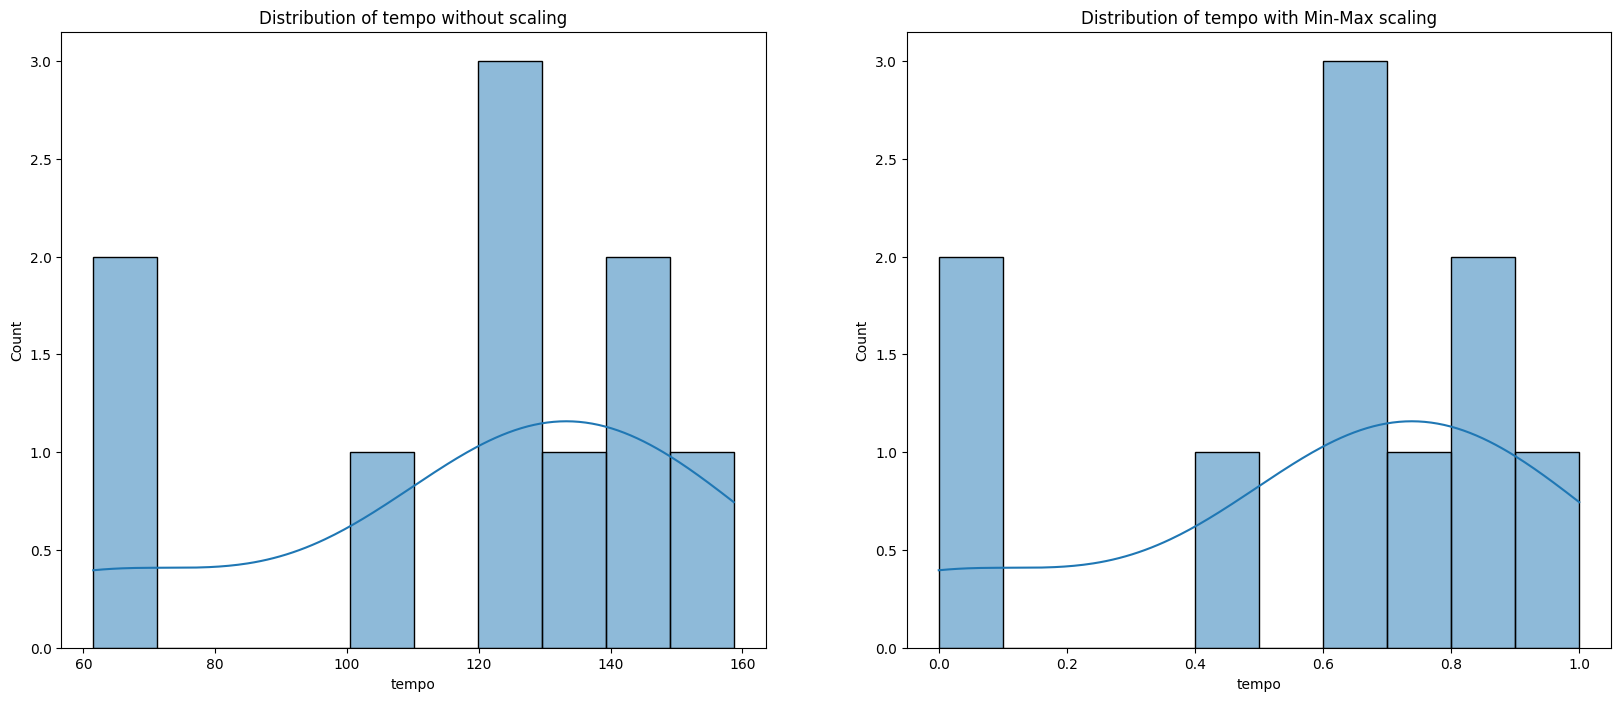

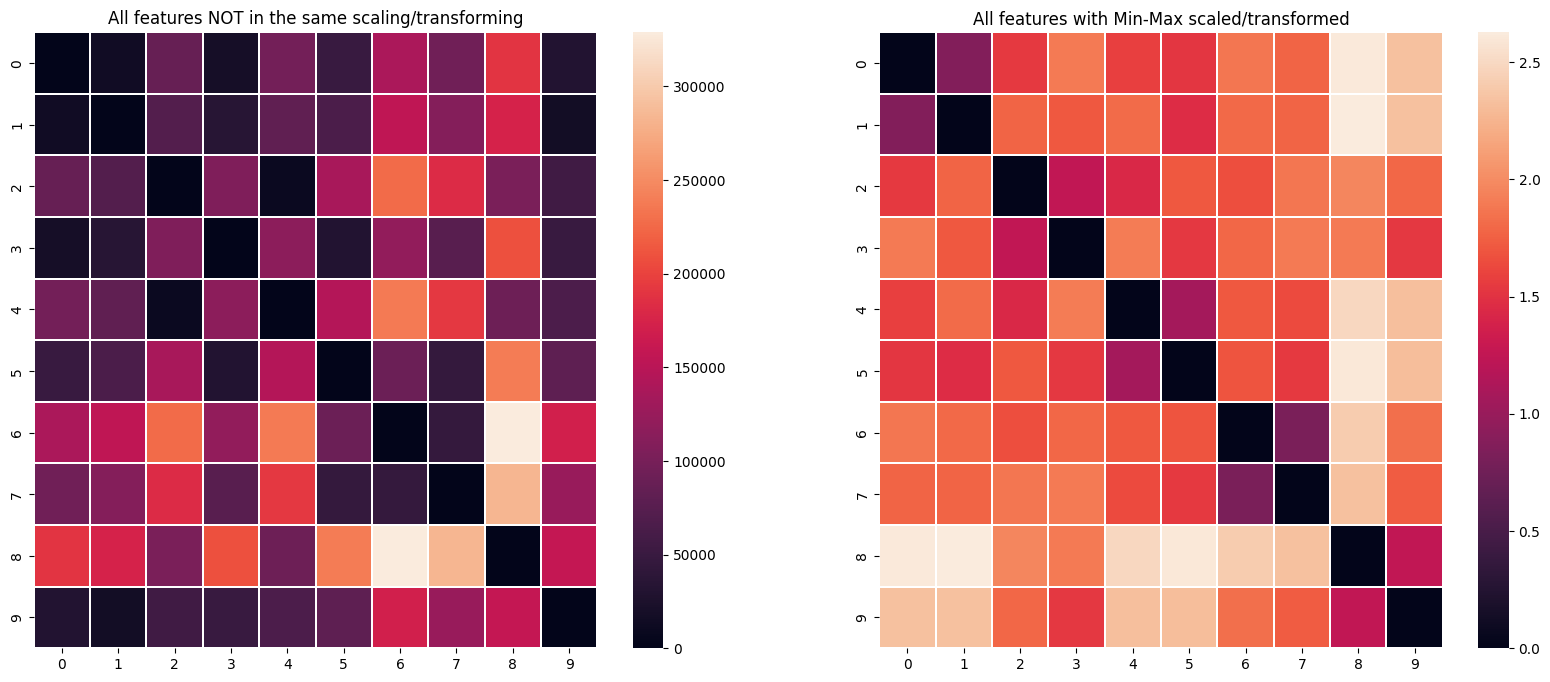

In [ ]:
scaler = MinMaxScaler().set_output(transform = 'pandas')
minmax_songs, minmax_distance = transformer_fn(scaler, 'Min-Max', 'tempo')

In [ ]:
minmax_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
1,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
2,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
3,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
4,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
5,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
6,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
7,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
8,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0
9,0.265359,0.043739,0.285714,0.292331,1.0,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000,0.482266,1.0


In [ ]:
minmax_distance

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.865424,1.543712,1.890353,1.570970,1.519874,1.869464,1.771203,2.611037,2.335151
1,0.865424,0.000000,1.769612,1.713638,1.813472,1.459289,1.801010,1.773372,2.627079,2.336751
2,1.543712,1.769612,0.000000,1.249081,1.435993,1.703637,1.656648,1.871919,1.968514,1.793372
3,1.890353,1.713638,1.249081,0.000000,1.903296,1.538547,1.794488,1.891412,1.892255,1.535254
4,1.570970,1.813472,1.435993,1.903296,0.000000,1.074686,1.705039,1.639784,2.488509,2.324324
5,1.519874,1.459289,1.703637,1.538547,1.074686,0.000000,1.686493,1.546424,2.605251,2.309939
6,1.869464,1.801010,1.656648,1.794488,1.705039,1.686493,0.000000,0.815132,2.403171,1.829474
7,1.771203,1.773372,1.871919,1.891412,1.639784,1.546424,0.815132,0.000000,2.331705,1.732820
8,2.611037,2.627079,1.968514,1.892255,2.488509,2.605251,2.403171,2.331705,0.000000,1.247945
9,2.335151,2.336751,1.793372,1.535254,2.324324,2.309939,1.829474,1.732820,1.247945,0.000000


Clustering with KMeans after Min-Max scaling

In [ ]:
dropped_columns = []
minmax_cluster = selected_features(minmax_songs, dropped_columns, 5)
minmax_cluster

,cluster,my_opinion
song_name,,
Águas De Março,0,lounge
The Girl From Ipanema,0,lounge
My Band,1,rap
The Real Slim Shady,1,rap
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2,classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,2,classical
Space Raiders - Charlotte de Witte Remix,3,techno
In Silence,3,techno
"Paint It, Black",4,old_school


# Standard Scaler (Mean & Deviation)

   original  transformed_scale
9    61.494          -1.791856
8    61.541          -1.790384
1   104.504          -0.445036
0   120.014           0.040646
7   128.009           0.291002
3   129.318           0.331992
6   131.997           0.415883
2   143.418           0.773521
5   148.174           0.922451
4   158.691           1.251782


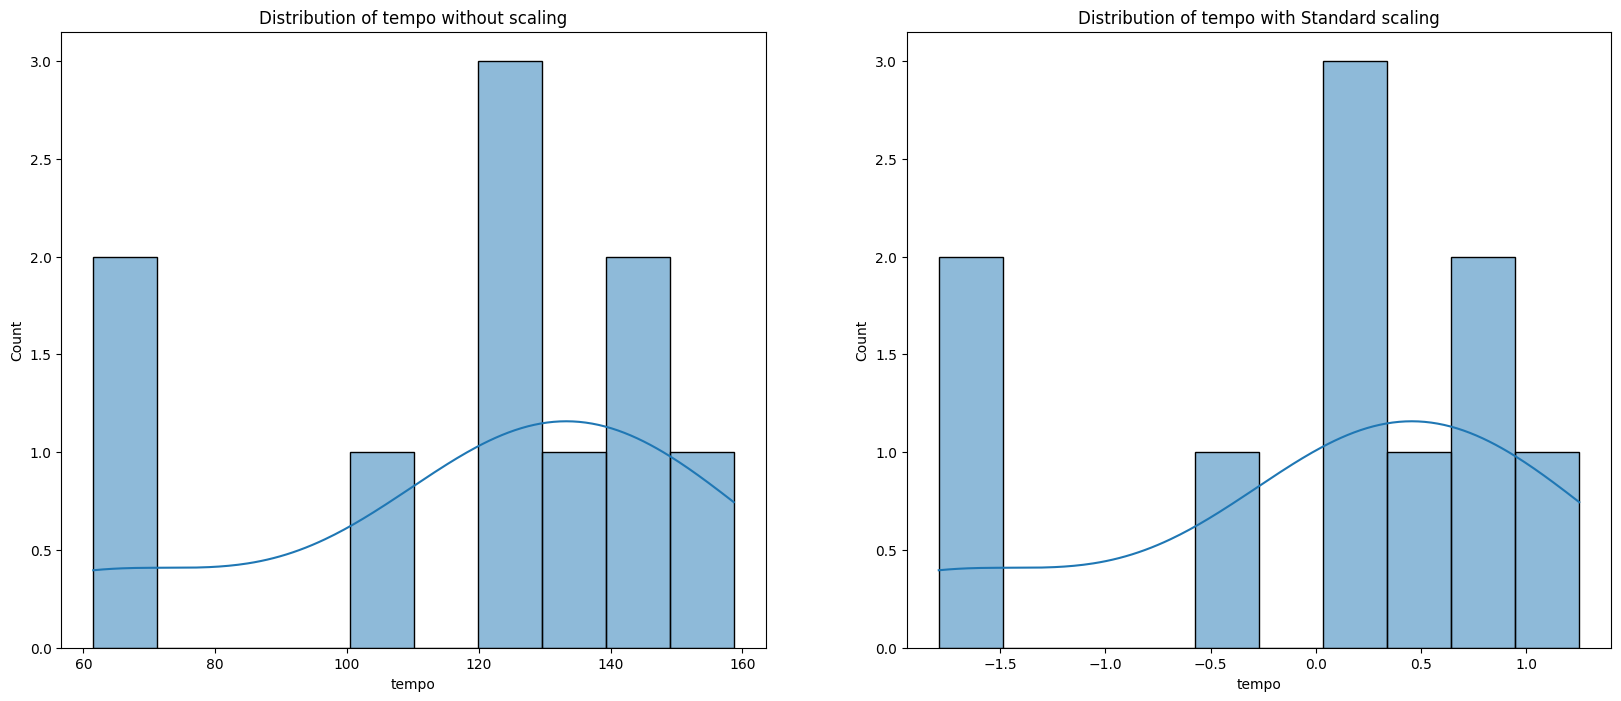

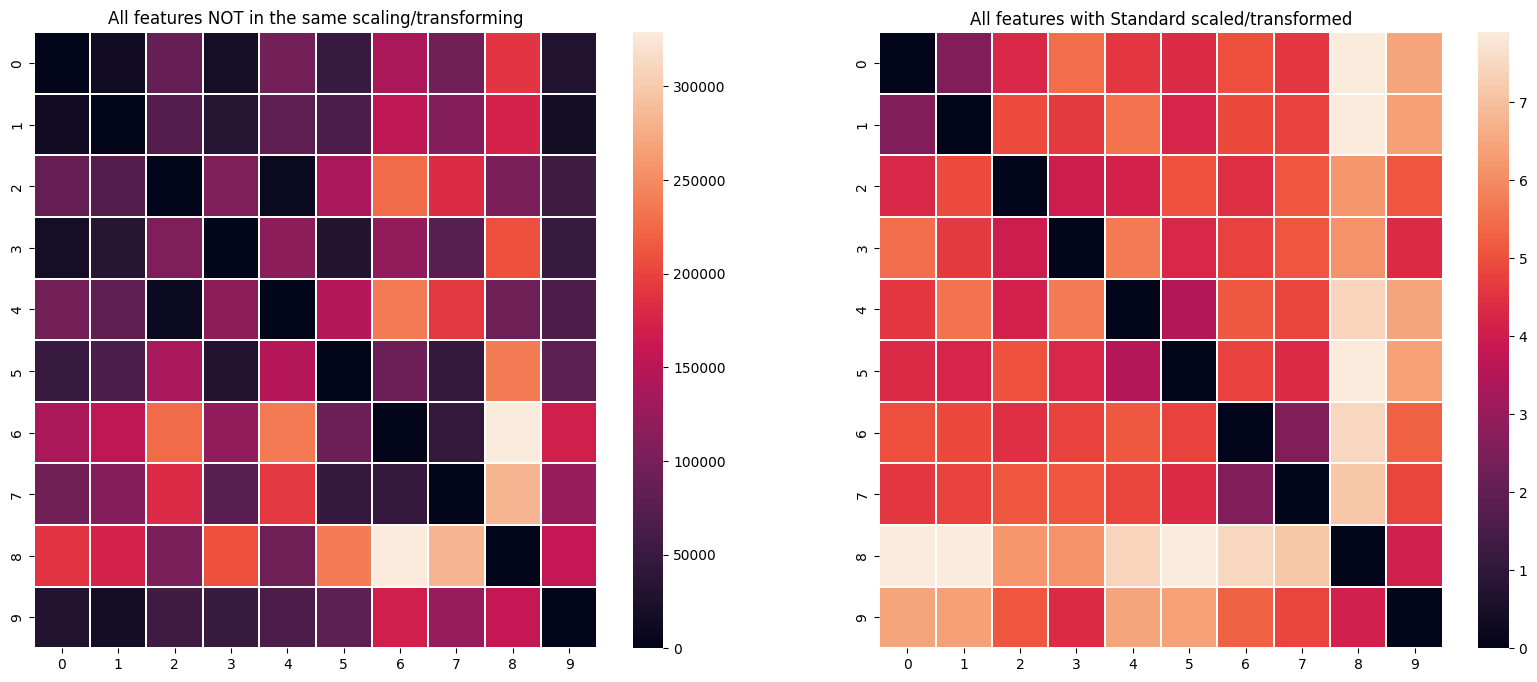

In [ ]:
#Scaler for Standard Scaler
scaler = StandardScaler().set_output(transform = 'pandas')
standard_songs, standard_distance = transformer_fn(scaler, 'Standard', 'tempo')

In [ ]:
dropped_columns = []
standard_cluster = selected_features(standard_songs, dropped_columns, 5)
standard_cluster

,cluster,my_opinion
song_name,,
Águas De Março,0,lounge
The Girl From Ipanema,0,lounge
My Band,1,rap
The Real Slim Shady,1,rap
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2,classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,2,classical
Space Raiders - Charlotte de Witte Remix,3,techno
In Silence,3,techno
"Paint It, Black",4,old_school


# Robust Sclaer (Q1 & Q3)

   original  transformed_scale
9    61.494          -2.087225
8    61.541          -2.085764
1   104.504          -0.750732
0   120.014          -0.268775
7   128.009          -0.020338
3   129.318           0.020338
6   131.997           0.103585
2   143.418           0.458481
5   148.174           0.606269
4   158.691           0.933074


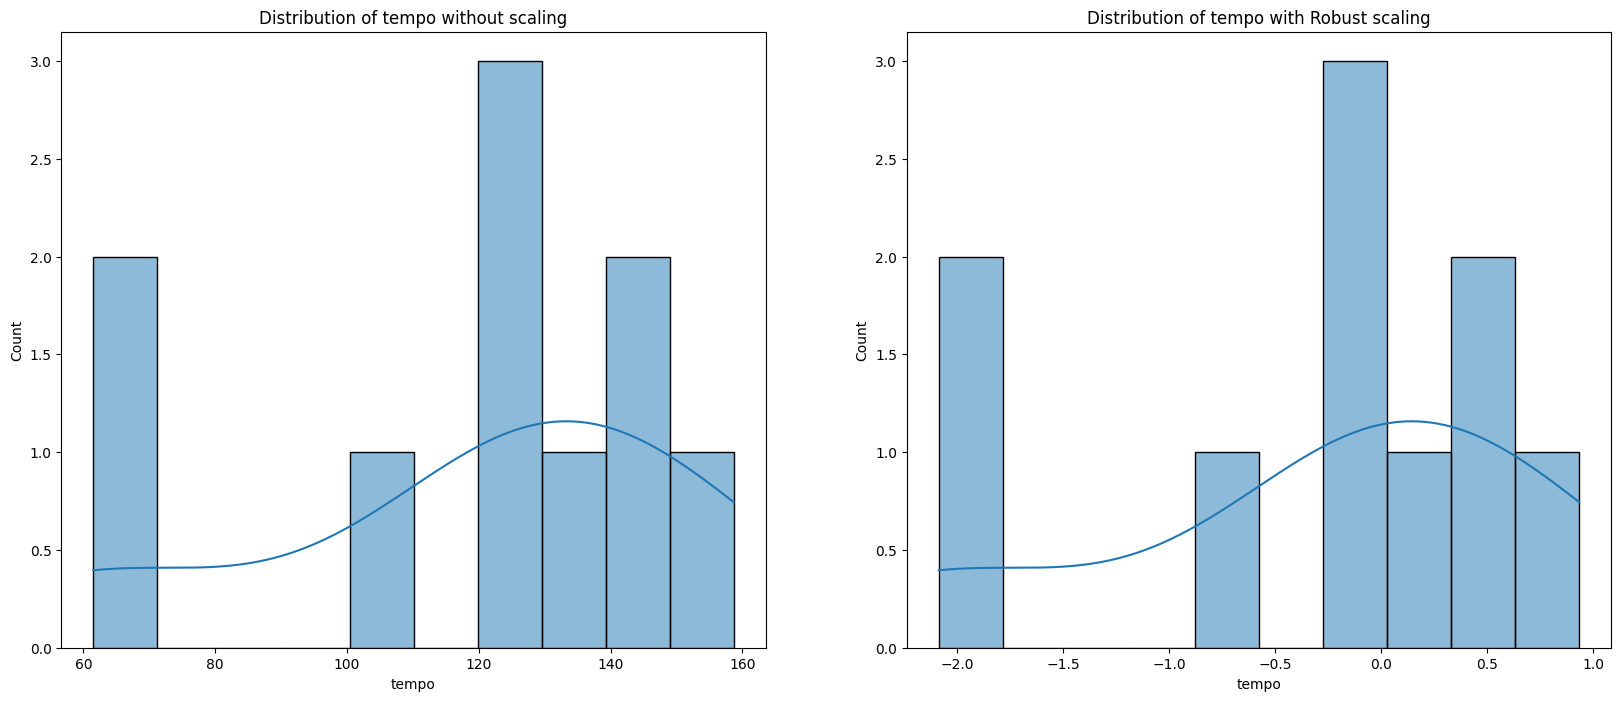

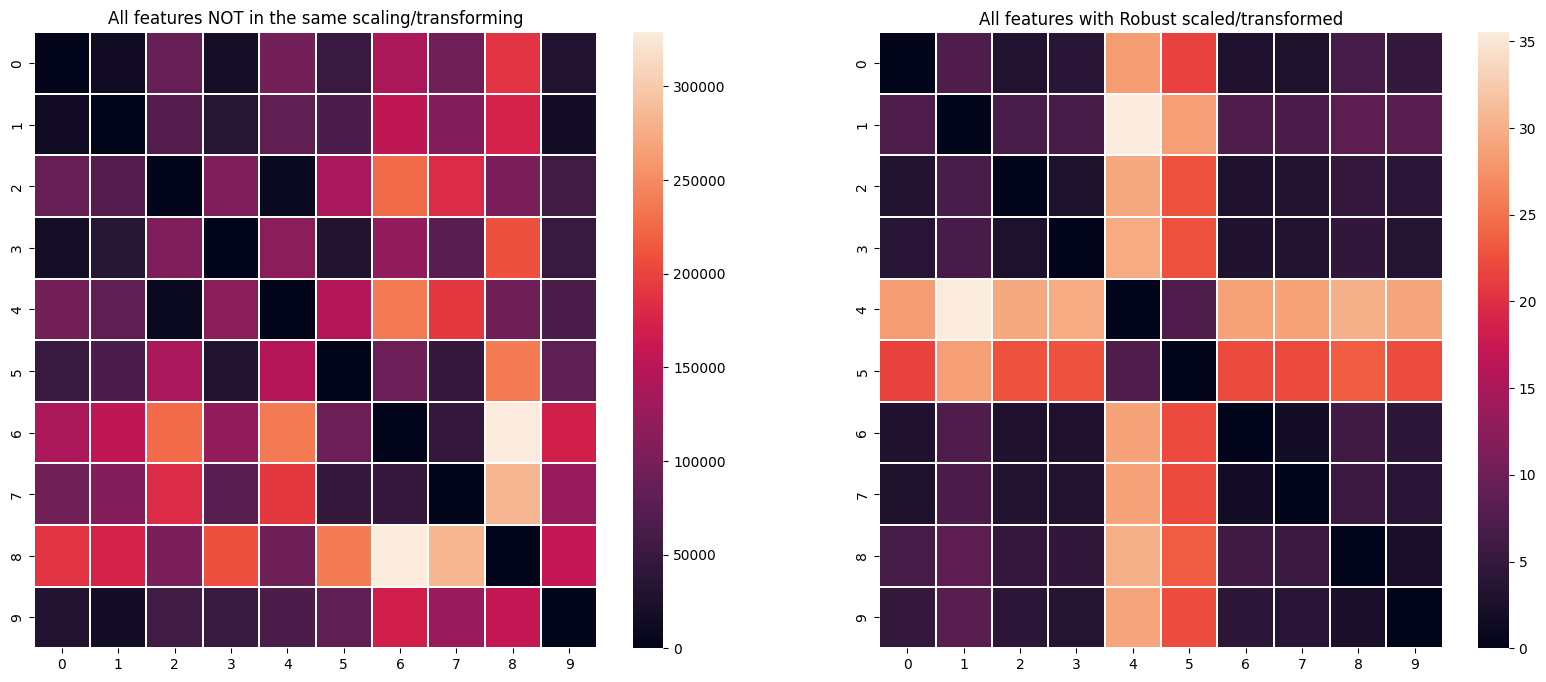

In [ ]:
scaler = RobustScaler().set_output(transform = 'pandas')
robust_songs, robust_distance = transformer_fn(scaler, 'Robust', 'tempo')

In [ ]:
dropped_columns = []
robust_cluster = selected_features(robust_songs, dropped_columns, 5)
robust_cluster

,cluster,my_opinion
song_name,,
My Band,0,rap
Águas De Março,0,lounge
The Girl From Ipanema,0,lounge
Space Raiders - Charlotte de Witte Remix,0,techno
In Silence,0,techno
"Paint It, Black",1,old_school
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2,classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,2,classical
Sultans Of Swing,3,old_school


# Quantile Transformer


   original  transformed_scale
9    61.494           0.000000
8    61.541           0.111111
1   104.504           0.222222
0   120.014           0.333333
7   128.009           0.444444
3   129.318           0.555556
6   131.997           0.666667
2   143.418           0.777778
5   148.174           0.888889
4   158.691           1.000000


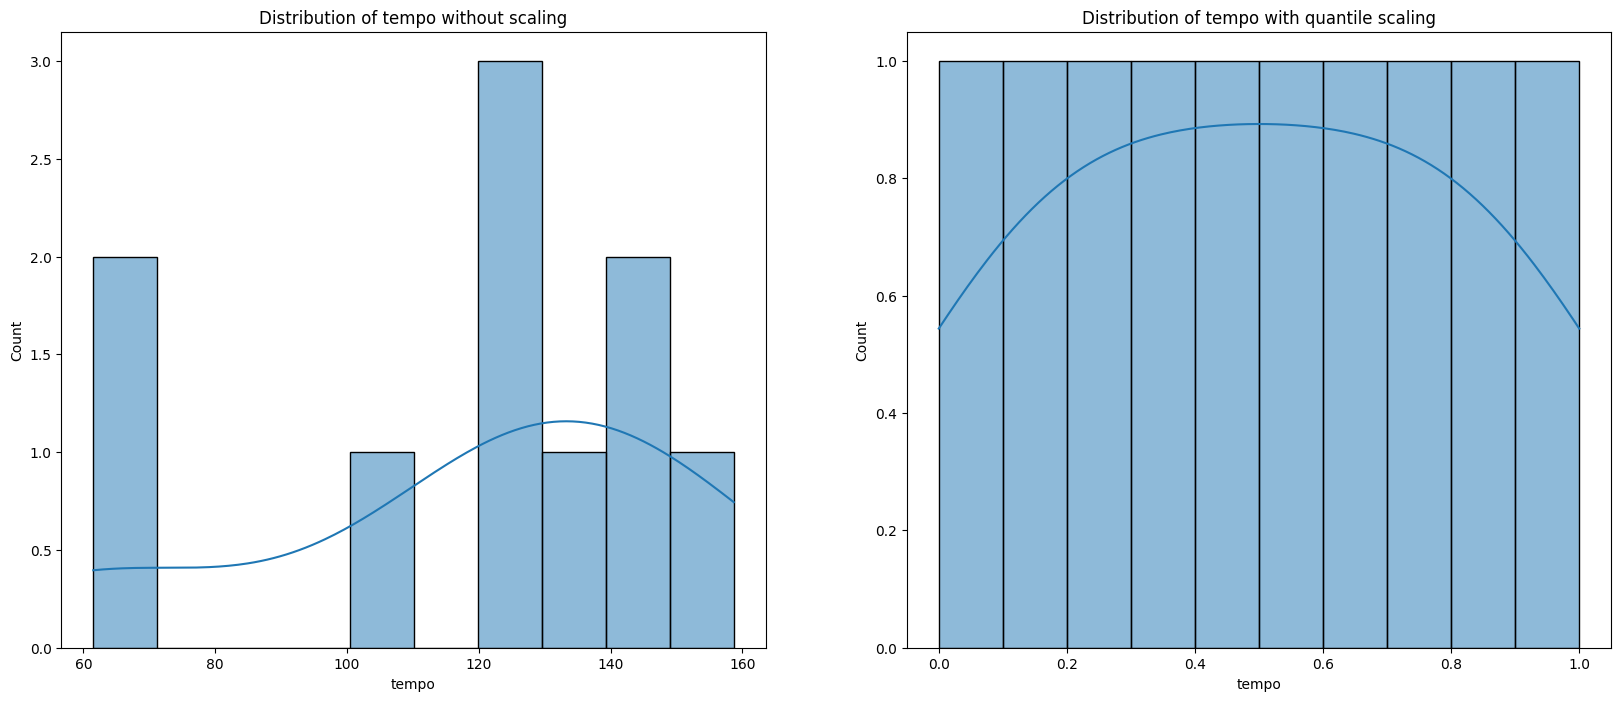

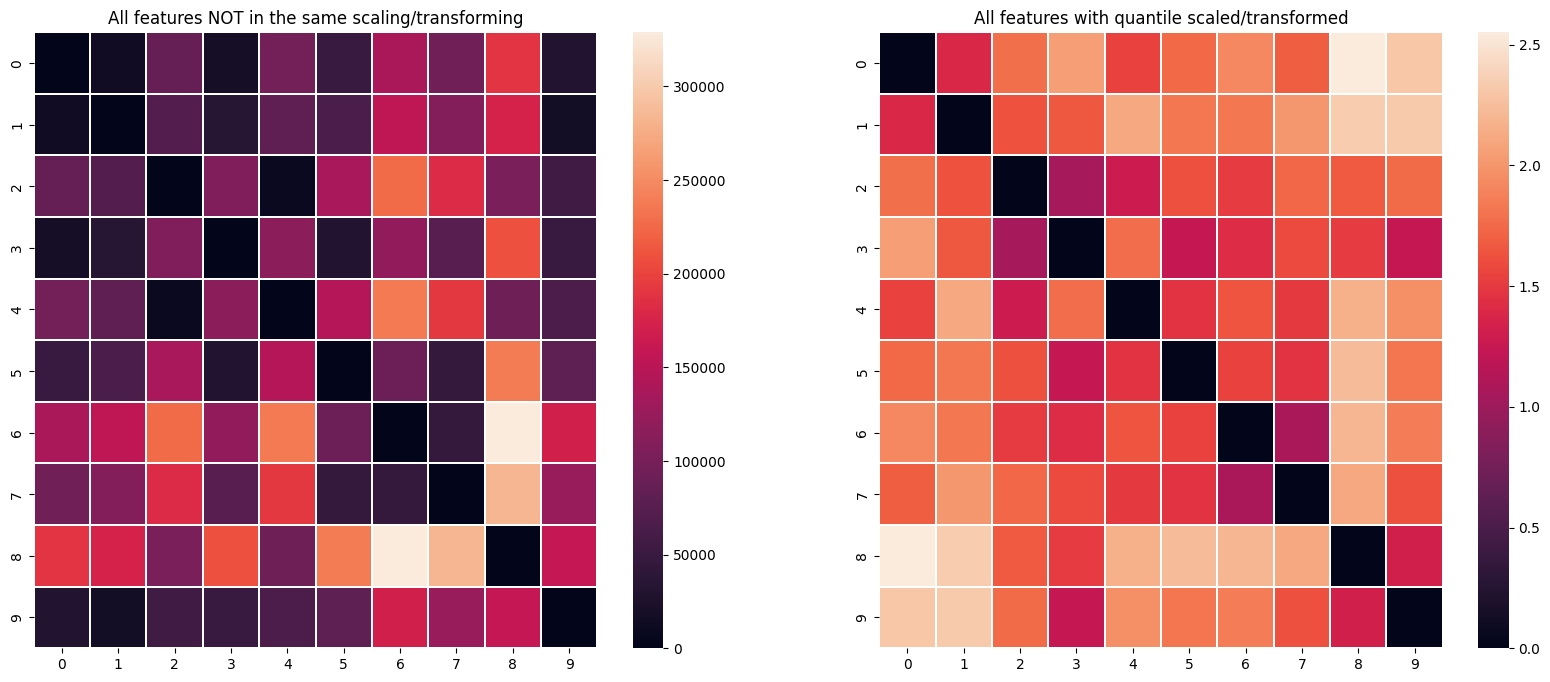

In [ ]:
number_of_sample = songs_10.shape[0]
scaler = QuantileTransformer(n_quantiles = number_of_sample).set_output(transform = 'pandas')
quantile_songs, quantile_distance = transformer_fn(scaler, 'quantile', 'tempo')

In [ ]:
dropped_columns = []
quantile_cluster = selected_features(quantile_songs, dropped_columns, 5)
quantile_cluster

,cluster,my_opinion
song_name,,
Águas De Março,0,lounge
The Girl From Ipanema,0,lounge
Sultans Of Swing,0,old_school
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0,classical
My Band,1,rap
The Real Slim Shady,1,rap
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2,classical
Space Raiders - Charlotte de Witte Remix,3,techno
In Silence,3,techno


# Power Transformer
It reshape the data more closely resemble normal distribution

   original  transformed_scale
9    61.494          -1.617666
8    61.541          -1.616974
1   104.504          -0.666126
0   120.014          -0.153505
7   128.009           0.148609
3   129.318           0.200589
6   131.997           0.309201
2   143.418           0.806331
5   148.174           1.029907
4   158.691           1.559634


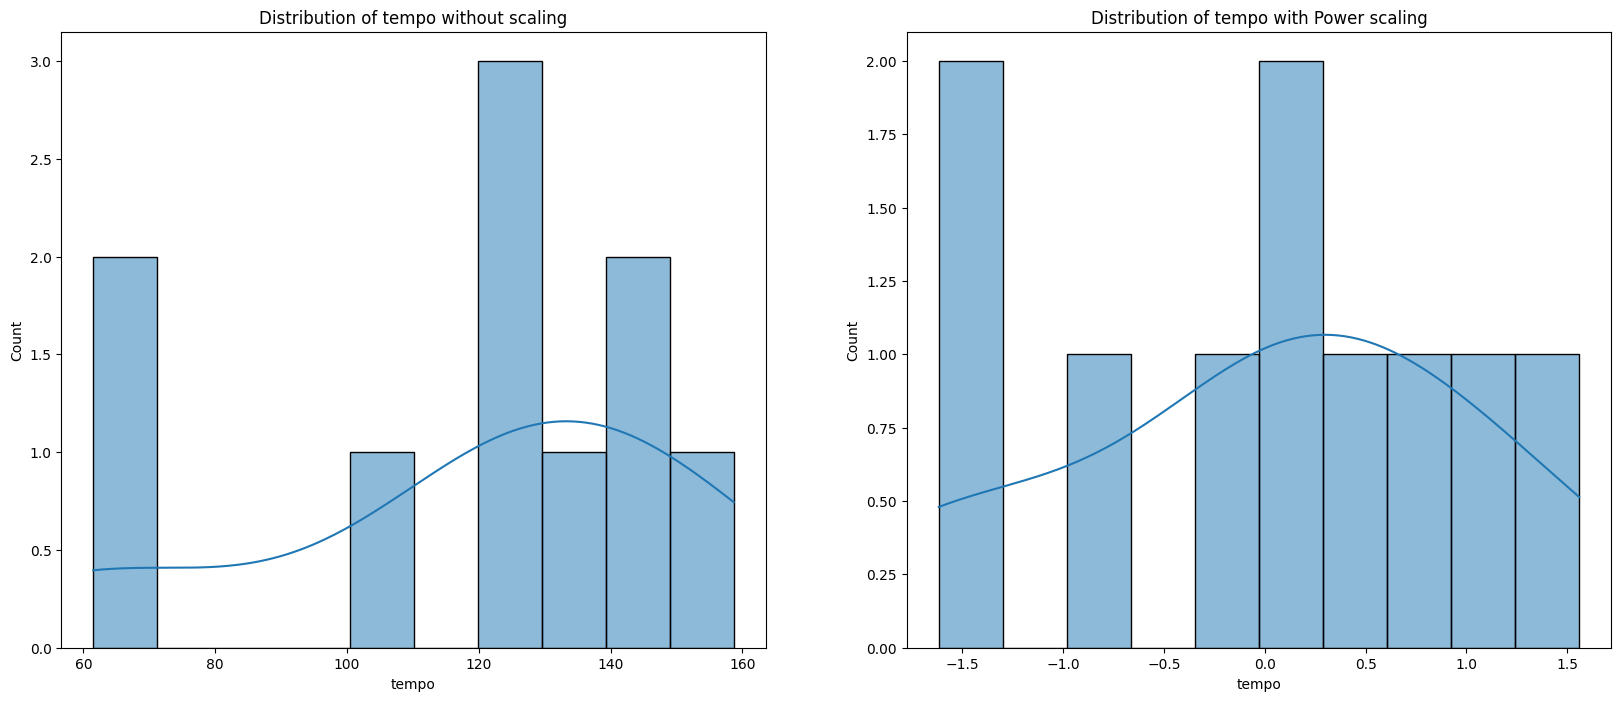

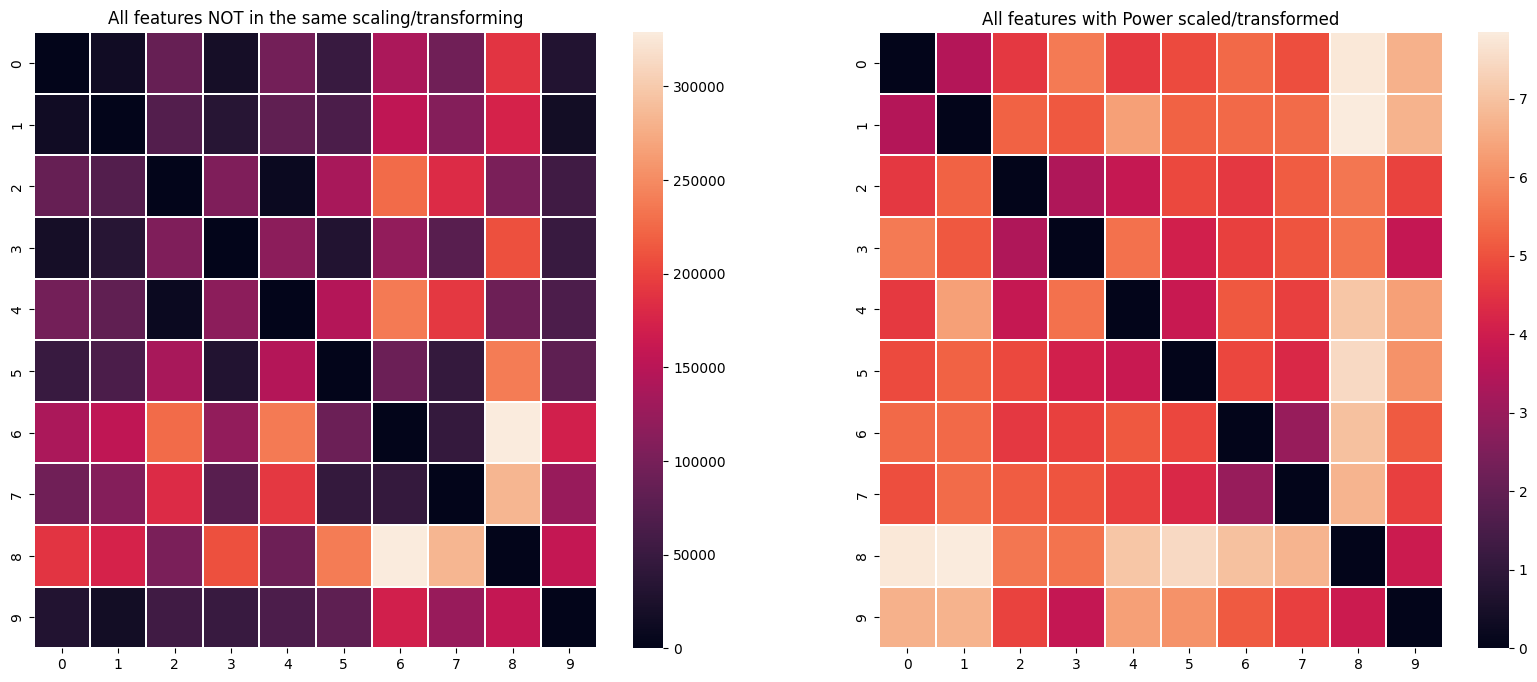

In [ ]:
# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")
"""
In this notebook we use the inline version of .set_output(transform="pandas")
Instead of the universal:
  from sklearn import set_config
  set_config(transform_output = "pandas")

This is because of a known bug when using the universal version with power transformer
https://github.com/scikit-learn/scikit-learn/issues/26443
"""
power_songs, power_distance = transformer_fn(scaler, 'Power', 'tempo')

In [ ]:
dropped_columns = []
power_cluster = selected_features(power_songs, dropped_columns, 5)
power_cluster

,cluster,my_opinion
song_name,,
Águas De Março,0,lounge
The Girl From Ipanema,0,lounge
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0,classical
My Band,1,rap
The Real Slim Shady,1,rap
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2,classical
Space Raiders - Charlotte de Witte Remix,3,techno
In Silence,3,techno
"Paint It, Black",4,old_school


# Overall transformers summary:
So far, the best Kmeans 5 clustering are with Min-Max and Standard scaler

# Apply the best clustering to the 5,000 songs

Explore & Clean the 5000 songs data frame

In [ ]:
songs_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
 15  time_signature    5235 non-null   int64  
 16  id                5235 non-null   object 


In [ ]:
songs_5000_with_name = songs_5000.copy()
songs_5000 = songs_5000.set_index(['name', 'artist']).drop(columns = ['id', 'html']).copy()

In [ ]:
songs_5000['type'].unique()

array(['     '], dtype=object)

In [ ]:
#drop 'type'
songs_5000 = songs_5000.drop(columns = ['type'])

# KMeans evaluations

In [ ]:
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

## Min-Max scaler

In [ ]:
scaler = MinMaxScaler().set_output(transform = 'pandas')

In [ ]:
minmax_5k_songs = scaler.fit_transform(songs_5000)

**Inertia Score**

In [ ]:
# Decide on a random_state to use
random_seed = 112

# Set the maximum number of clusters to try
min_k = 1
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(min_k, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      random_state = random_seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(minmax_5k_songs)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

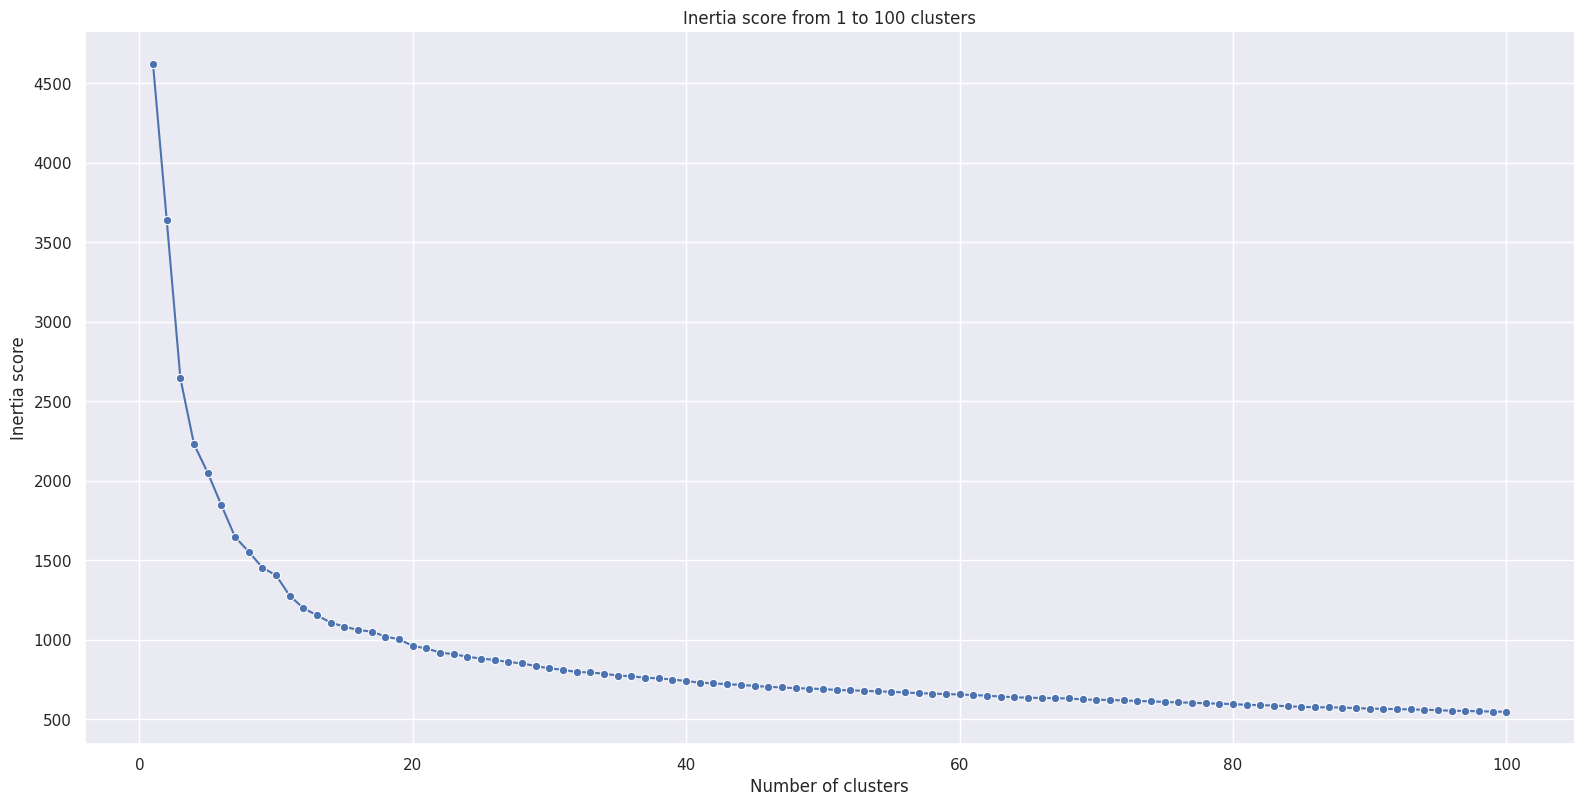

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(min_k, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from {min_k} to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

**Silhouette score**

In [ ]:
# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(min_k+1, max_k+1):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    random_state = random_seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(minmax_5k_songs)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(minmax_5k_songs, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

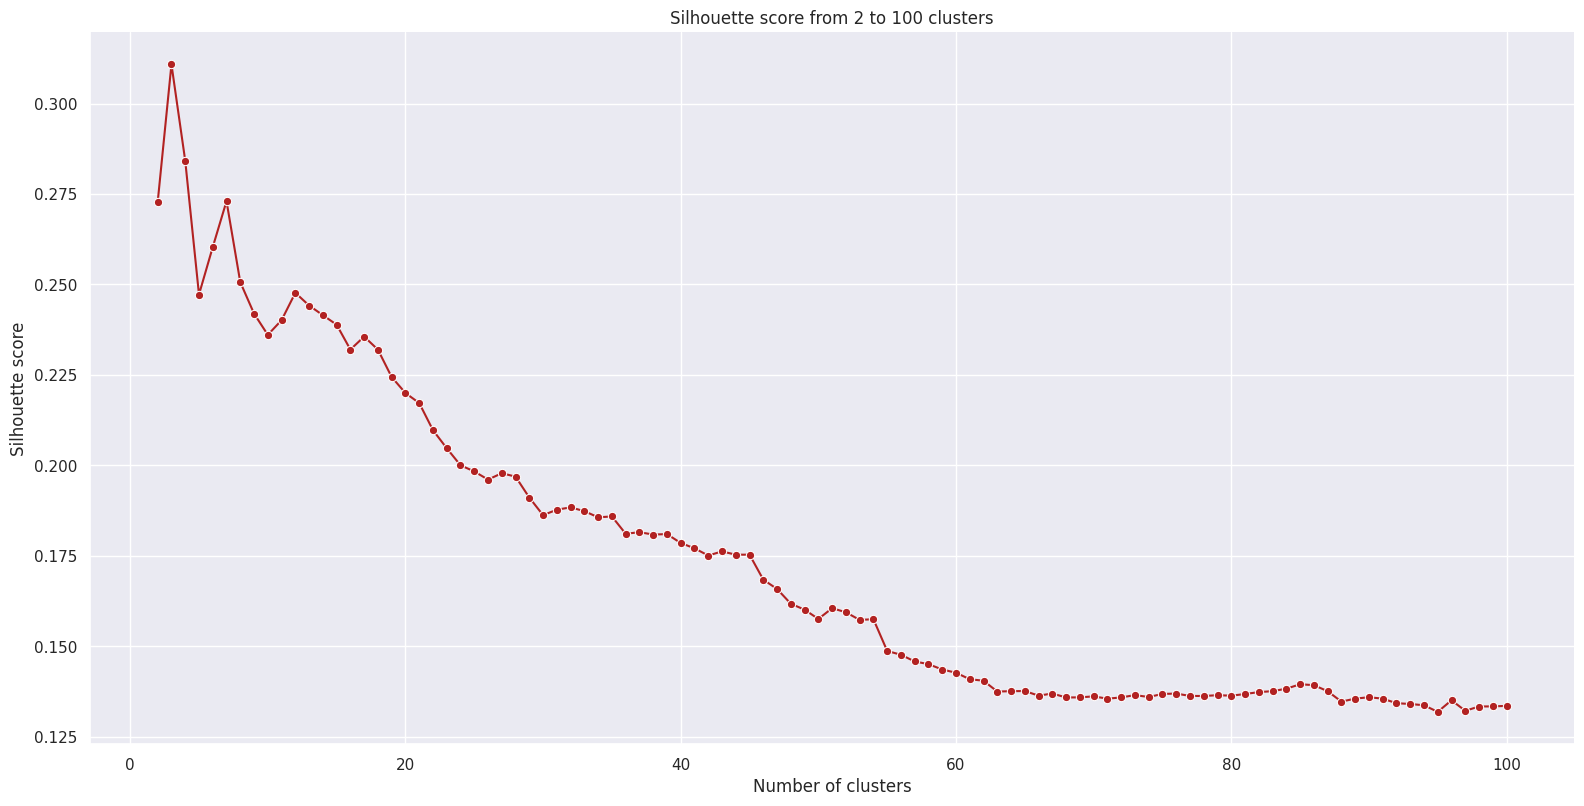

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(min_k+1, max_k+1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2,
            color = 'firebrick')
.set(title=f"Silhouette score from {min_k+1} to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

create a function

In [ ]:
def kmeans_evaluate(features_df, scaler, min_k, max_k):
  # Transform the data
  transformed_df = scaler.fit_transform(features_df)

  # Decide on a random_state to use
  random_seed = 112

  # Inetia evaluation
  # Create an empty list to store the inertia scores
  inertia_list = []

  # Iterate over the range of cluster numbers
  for i in range(min_k, max_k + 1):

      # Create a KMeans object with the specified number of clusters
      myKMeans = KMeans(n_clusters = i,
                        random_state = random_seed)

      # Fit the KMeans model to the scaled data
      myKMeans.fit(transformed_df)

      # Append the inertia score to the list
      inertia_list.append(myKMeans.inertia_)

  # Set the Seaborn theme to darkgrid
  sns.set_theme(style='darkgrid')

  (
  # Create a line plot of the inertia scores
  sns.relplot(y = inertia_list,
              x = range(min_k, max_k + 1),
              kind = 'line',
              marker = 'o',
              height = 8,
              aspect = 2)
  # Set the title of the plot
  .set(title=f"Inertia score from {min_k} to {max_k} clusters")
  # Set the axis labels
  .set_axis_labels("Number of clusters", "Inertia score")
  );
  plt.show()


  # Silhouette score evaluation
  # Create an empty list to store the silhouette scores
  sil_scores = []


  for j in range(min_k+1, max_k+1):

      # Create a KMeans object with the specified number of clusters
      kmeans = KMeans(n_clusters = j,
                      random_state = random_seed)

      # Fit the KMeans model to the scaled data
      kmeans.fit(transformed_df)

      # Get the cluster labels
      labels = kmeans.labels_

      # Calculate the silhouette score
      score = silhouette_score(transformed_df, labels)

      # Append the silhouette score to the list
      sil_scores.append(score)

  (
  sns.relplot(y = sil_scores,
              x = range(min_k+1, max_k+1),
              kind = 'line',
              marker = 'o',
              height = 8,
              aspect = 2,
              color = 'firebrick')
  .set(title=f"Silhouette score from {min_k+1} to {max_k} clusters")
  .set_axis_labels("Number of clusters", "Silhouette score")
  );
  plt.show()


## Standard scaler

In [ ]:
scaler = StandardScaler().set_output(transform = 'pandas')

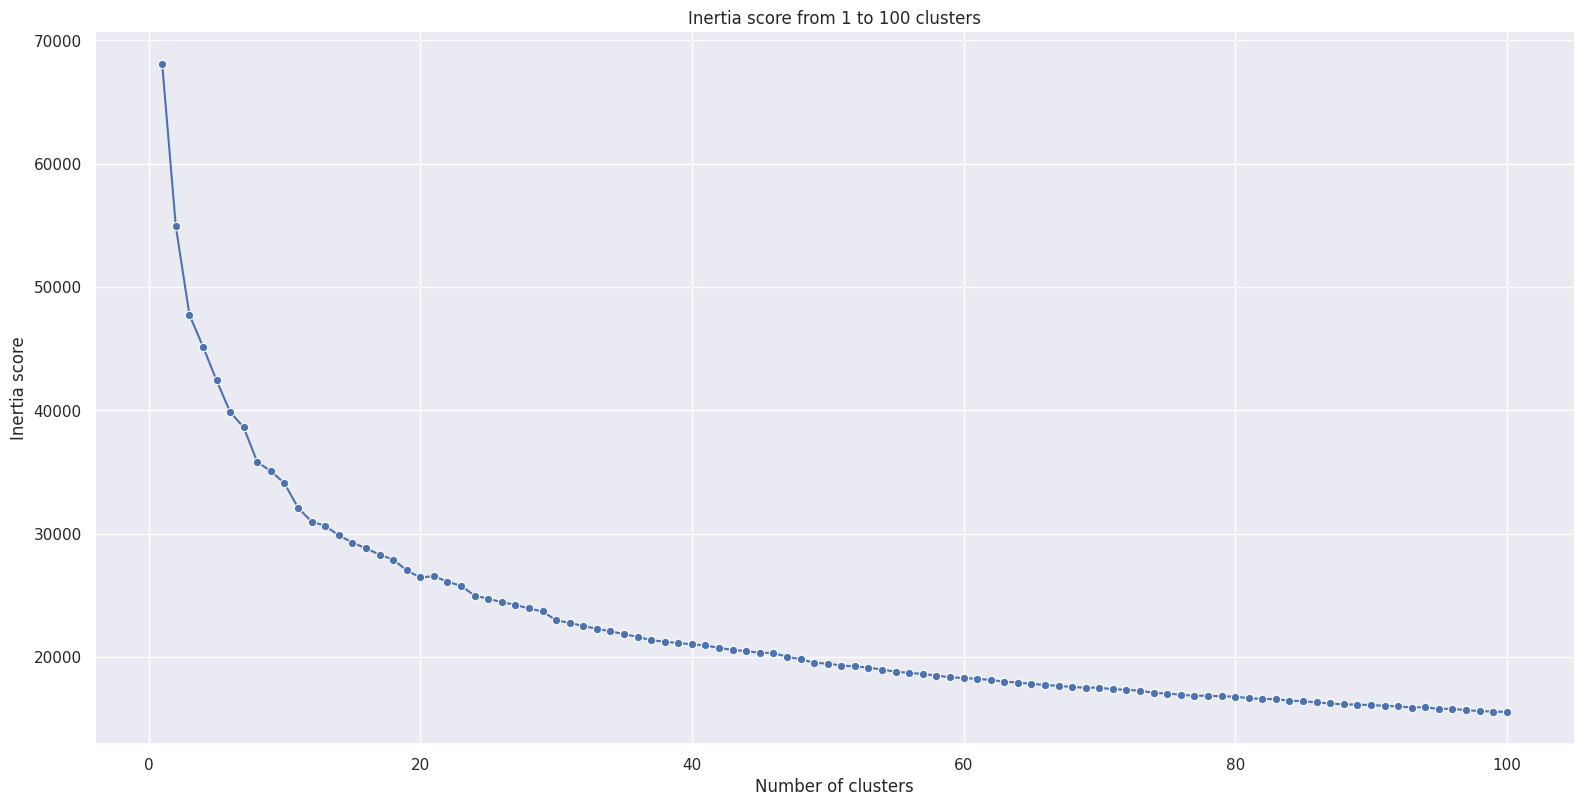

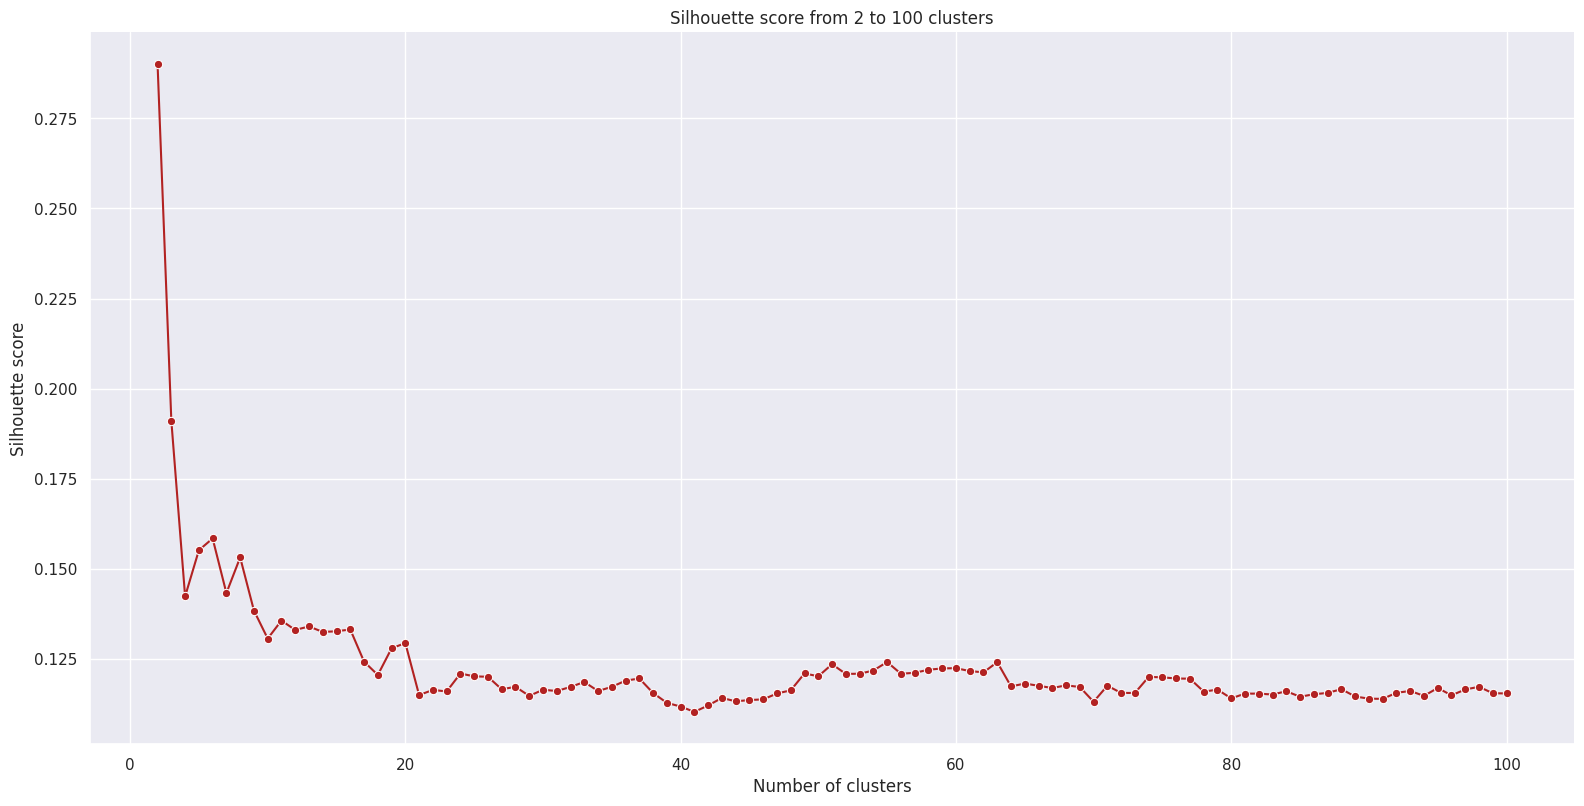

In [ ]:
kmeans_evaluate(songs_5000, scaler, 1, 100)

## Robust scaler

In [ ]:
scaler = RobustScaler().set_output(transform = 'pandas')

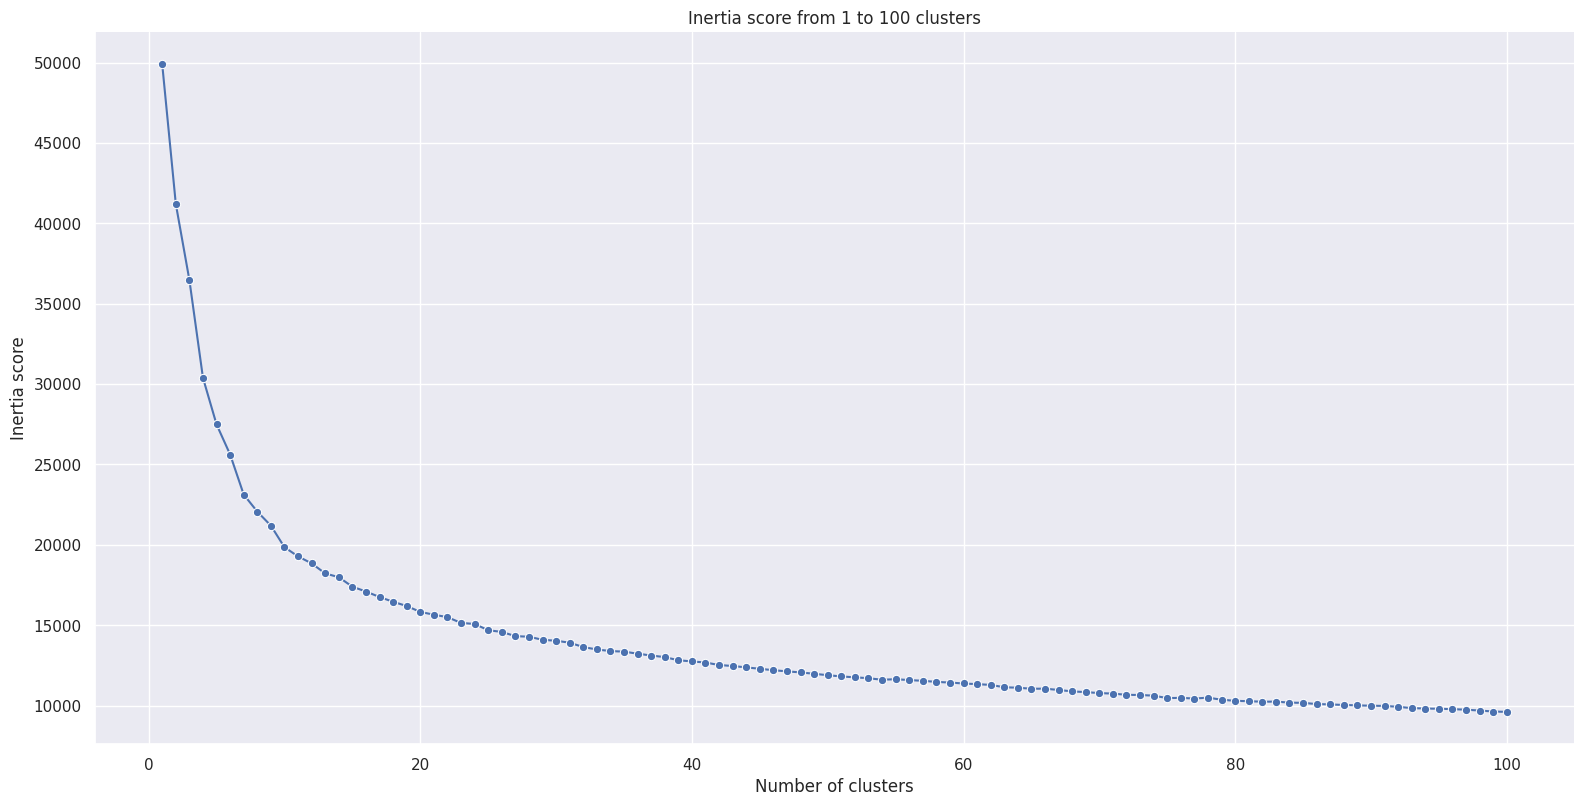

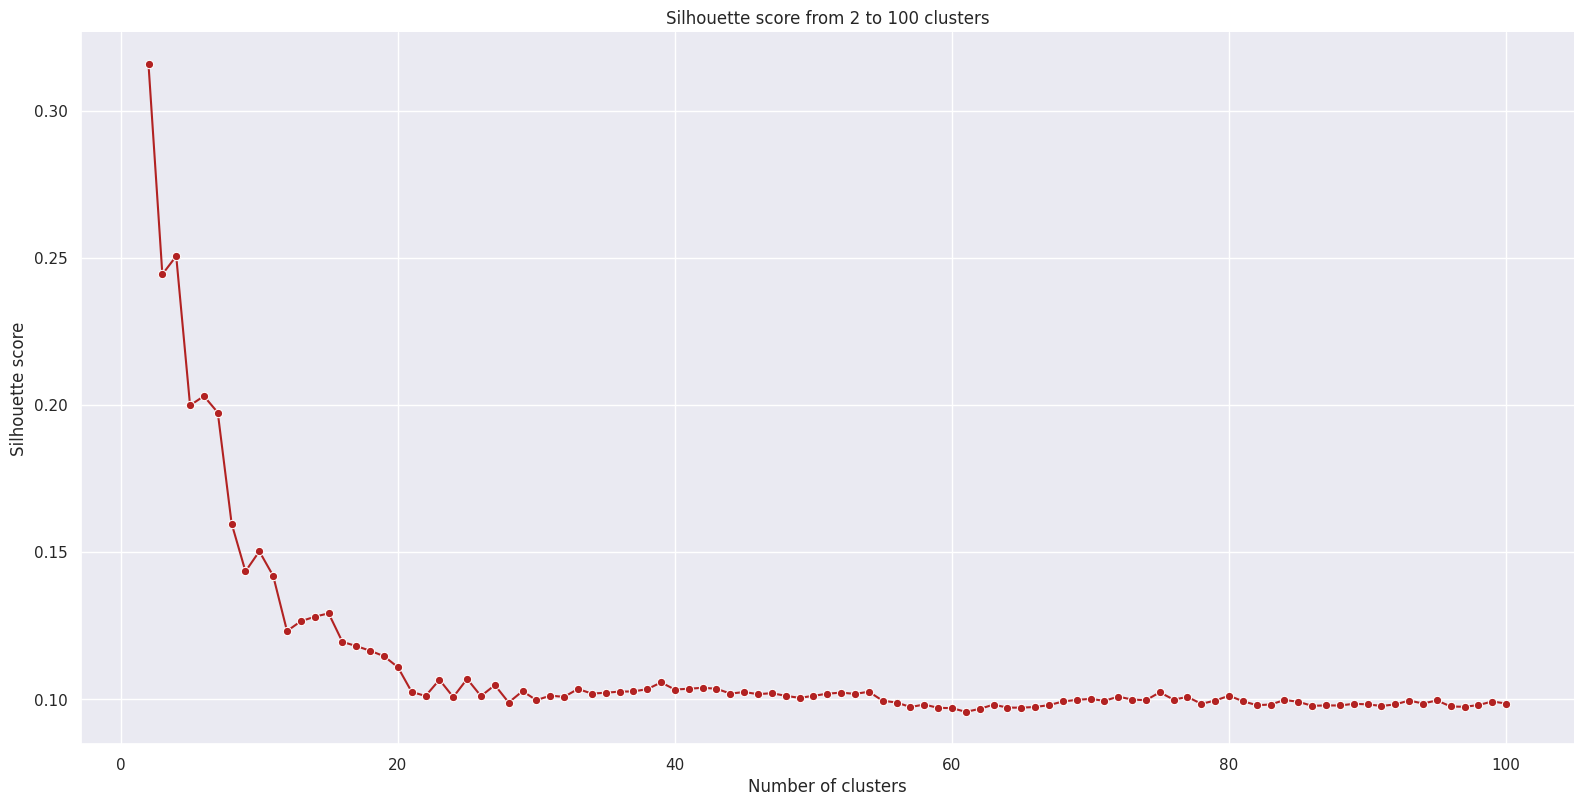

In [ ]:
kmeans_evaluate(songs_5000, scaler, 1, 100)

## Quantile transformer

In [ ]:
scaler = QuantileTransformer().set_output(transform = 'pandas')

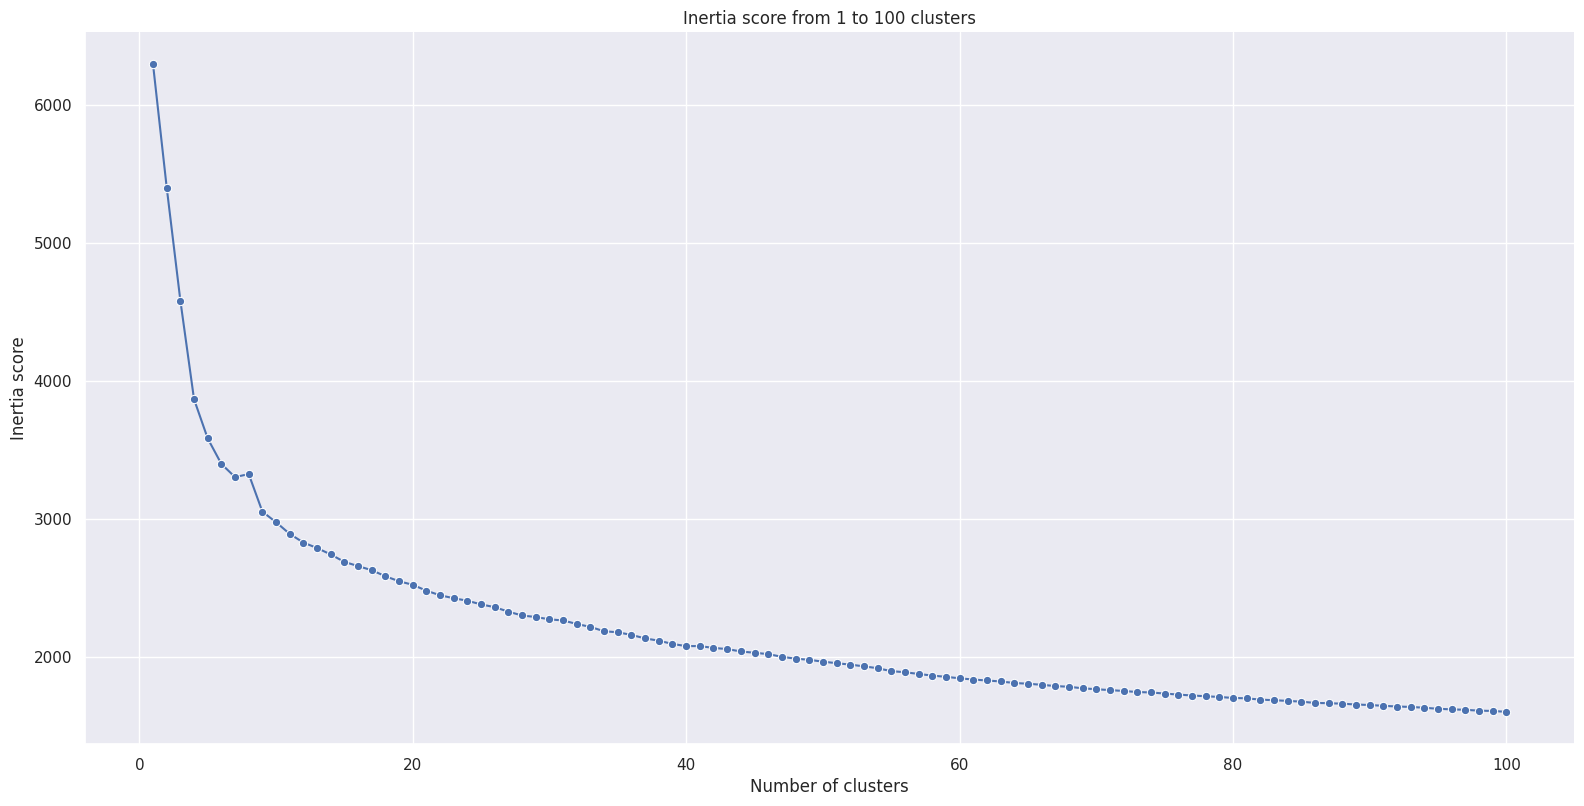

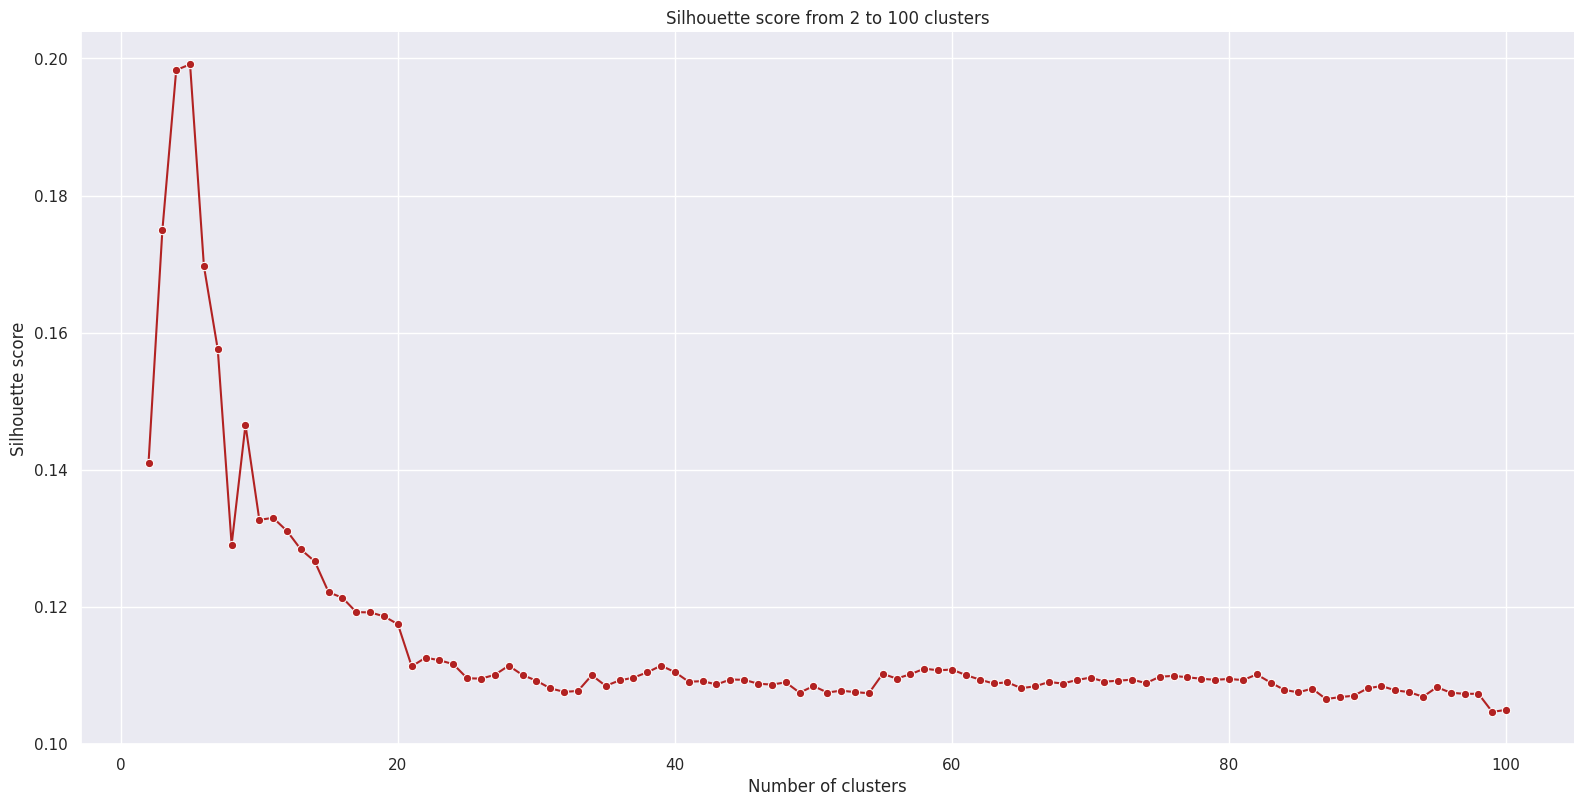

In [ ]:
kmeans_evaluate(songs_5000, scaler, 1, 100)

## Power Transformer

In [ ]:
scaler = PowerTransformer().set_output(transform = 'pandas')

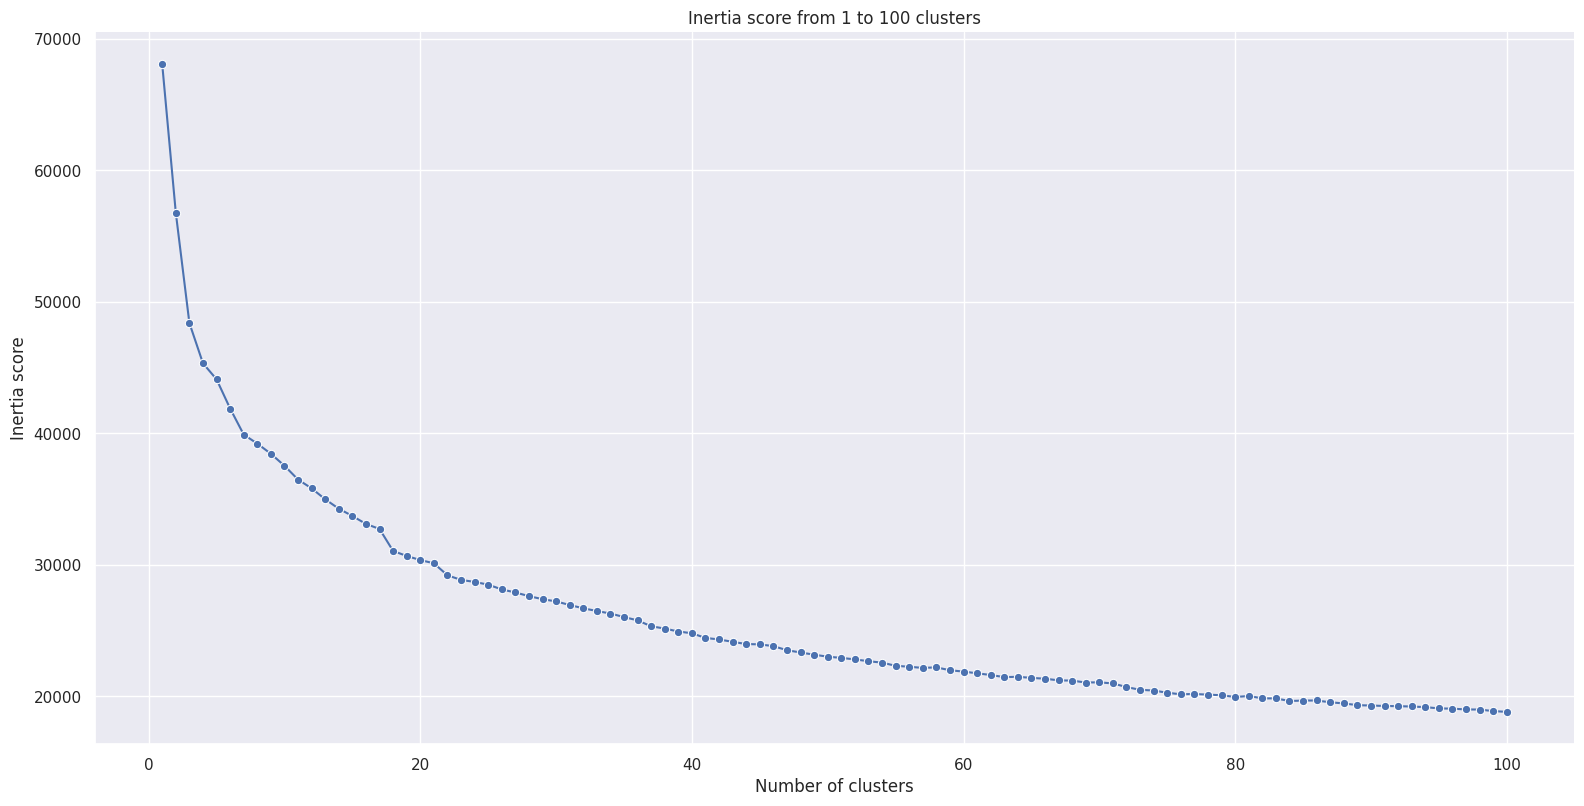

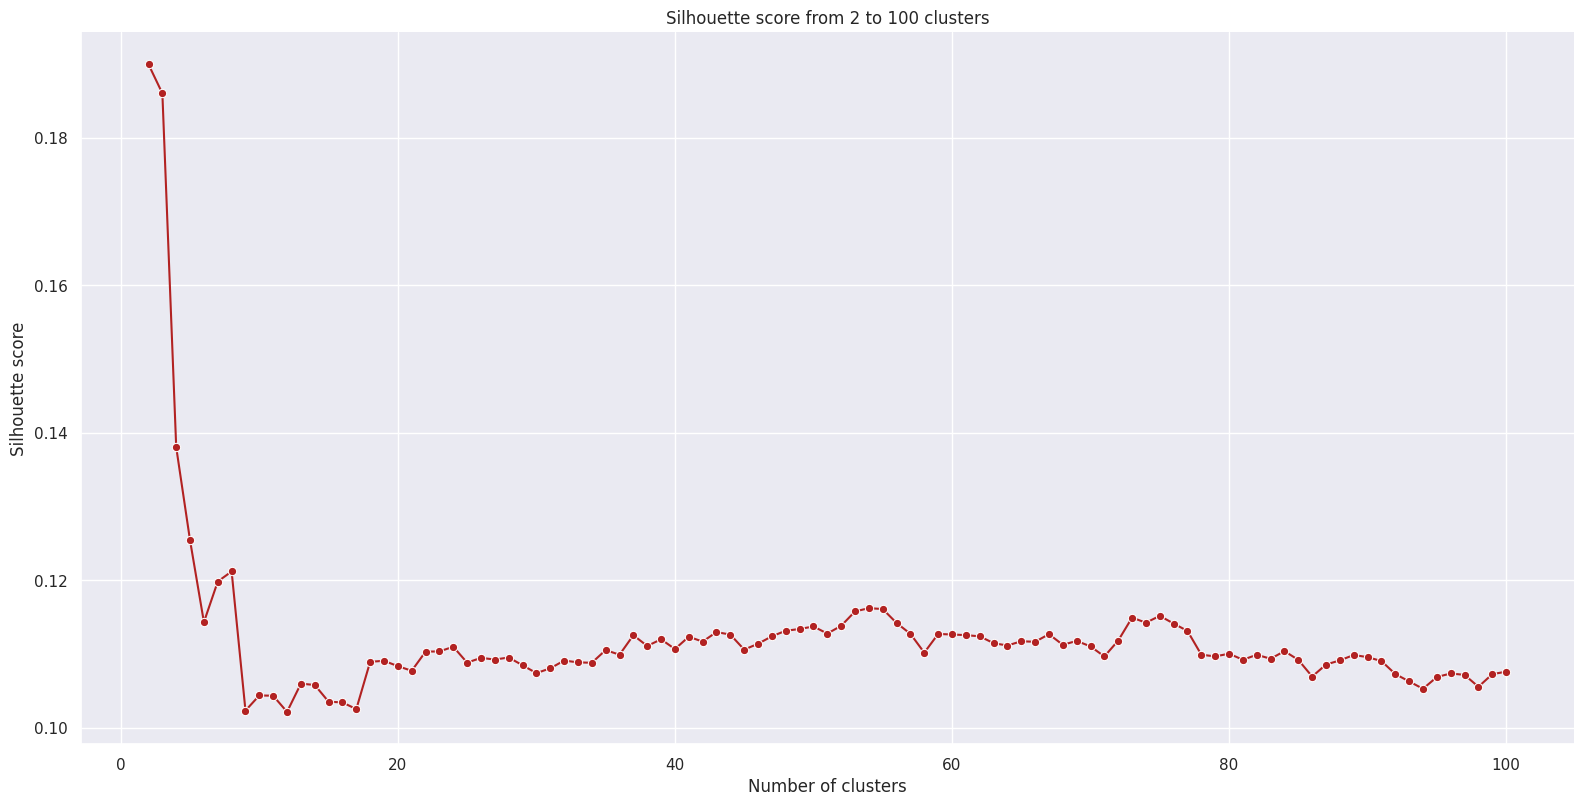

In [ ]:
kmeans_evaluate(songs_5000, scaler, 1, 100)

# Cluster the songs with selected KMean

In [ ]:
def cluster_transform (data_features, dropped_columns, scaler, k_means):

  dropped_features_df = data_features.drop(columns = dropped_columns)
  # transform the data
  transformed_df = scaler.fit_transform(dropped_features_df)
  # initialize the model
  random_seed = 112
  features_kmeans = KMeans(n_clusters = k_means, # we'll explore how to choose the number of clusters in a later notebook
                          random_state = random_seed)

  # fit the model to the data
  features_kmeans.fit(transformed_df)

  # obtain the cluster output
  features_cluster = features_kmeans.labels_

  # attach the cluster output to our original DataFrame
  transformed_df['cluster'] = features_cluster

  return transformed_df

In [ ]:
# Min-Max scaler with kmeans = 20
scaler = MinMaxScaler().set_output(transform = 'pandas')
dropped_columns = ['duration_ms', 'speechiness']
minmax_k20 = cluster_transform(songs_5000, dropped_columns, scaler, 20)
minmax_k20.groupby(by ='cluster').mean()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,
0,0.300542,0.113473,0.419177,0.607447,1.0,0.949744,0.881817,0.130891,0.131672,0.487259,0.724620
1,0.623275,0.371433,0.506270,0.756350,1.0,0.761962,0.760826,0.168593,0.581476,0.574725,0.775862
2,0.459102,0.869832,0.472249,0.889542,0.0,0.032015,0.056720,0.268441,0.276062,0.593828,0.789474
3,0.393388,0.858366,0.759221,0.873493,1.0,0.044648,0.111521,0.206671,0.247956,0.575677,0.780571
4,0.644114,0.587819,0.732100,0.834770,1.0,0.560401,0.013263,0.194703,0.759732,0.571816,0.792035
5,0.333279,0.130306,0.516918,0.617267,0.0,0.930210,0.886431,0.132483,0.162602,0.477307,0.744395
6,0.445462,0.819123,0.165603,0.874123,1.0,0.046042,0.062523,0.190402,0.277118,0.572201,0.780702
7,0.757753,0.731134,0.859979,0.877082,0.0,0.166100,0.012501,0.189991,0.747718,0.554148,0.799234
8,0.300061,0.905827,0.570745,0.845011,0.0,0.010061,0.809805,0.201012,0.236786,0.572693,0.769173


In [ ]:
clustered_songs_20 = minmax_k20.reset_index()[['name', 'artist', 'cluster']]
sample_songs_20 = clustered_songs_20.groupby('cluster').sample(n = 3, random_state = 42)

In [ ]:
sample_songs_20

,name,artist,cluster
1835,Halo ...,Henry Smith,0
2097,Diabelli Variations - 33 Variations on a Waltz...,Ludwig van Beethoven,0
2053,"Lob der Frauen, Polka Mazurka, Op. 315 ...",Johann Strauss II,0
863,Rebel Rouser ...,Duane Eddy,1
47,Triste ...,Brazilian Jazz,1
1855,I Don't Care ...,2CELLOS,1
3053,Marrakech ...,R3HAB,2
725,Love Me Again ...,John Newman,2
4714,Durch den Monsun ...,Tokio Hotel,2
5123,Let It Fall - Live ...,Tasha Cobbs Leonard,3


In [ ]:
# Min-Max scaler with kmeans = 40
scaler = MinMaxScaler().set_output(transform = 'pandas')
dropped_columns = ['duration_ms', 'speechiness']
minmax_k40 = cluster_transform(songs_5000, dropped_columns, scaler, 40)
minmax_k40.groupby(by ='cluster').mean()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,
0,0.334651,0.130264,0.743608,0.635450,1.0,0.960286,0.885795,0.120866,0.144319,0.554500,0.723438
1,0.297350,0.932766,0.766234,0.867664,1.0,0.006735,0.114465,0.207386,0.198575,0.566033,0.773714
2,0.661653,0.646254,0.125823,0.838705,1.0,0.580838,0.030166,0.225223,0.815640,0.560743,0.798551
3,0.684943,0.600030,0.735708,0.863751,0.0,0.140475,0.005732,0.140067,0.379159,0.560768,0.789691
4,0.753036,0.750227,0.482193,0.883657,0.0,0.126446,0.011286,0.163336,0.739290,0.540260,0.796907
5,0.343968,0.923617,0.715667,0.853865,0.0,0.002448,0.504612,0.190748,0.212788,0.572942,0.757447
6,0.264417,0.899048,0.133798,0.836801,1.0,0.006497,0.834215,0.201442,0.225171,0.571226,0.768548
7,0.332837,0.131394,0.520362,0.618037,0.0,0.929019,0.892142,0.133100,0.164133,0.477181,0.742986
8,0.506682,0.236426,0.151748,0.741334,1.0,0.867794,0.040761,0.177310,0.396445,0.516041,0.769231


In [ ]:
clustered_songs_40 = minmax_k40.reset_index()[['name', 'artist', 'cluster']]
sample_songs_40 = clustered_songs_40.groupby('cluster').sample(n = 3, random_state = 42)
sample_songs_40

,name,artist,cluster
2029,7 Years ...,Henry Smith,0
1980,Lullaby for the Son of a Pianist ...,Jorge Grundman,0
1895,"Shepherd's Song (After ""Schafe können sicher w...",Johann Sebastian Bach,0
3755,Blood-Coloured ...,Edge Of Sanity,1
3397,Maze of Torment ...,Morbid Angel,1
...,...,...,...
1717,Memories ...,Maroon 5,38
1157,Morning Has Broken ...,Yusuf / Cat Stevens,38
3576,"No Guts, No Glory ...",Bolt Thrower,39
3890,Wings of Funeral ...,Morbid,39
